# 4. Linear Models for Classification

original work by ctgk
https://github.com/ctgk/PRML/blob/master/notebooks/ch04_Linear_Models_for_Classfication.ipynb

In [2]:
import sys
sys.path.append('..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.features import PolynomialFeatures
from prml.linear import (
    LeastSquaresClassifier,
    LogisticRegressor,
    SoftmaxRegressor,
)

np.random.seed(1234)

In [4]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

## 4.1 Discriminant Functions

### 4.1.3 Least squares for classification

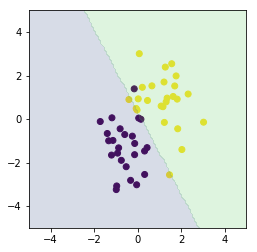

In [5]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(X_train, y_train)
y = model.classify(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

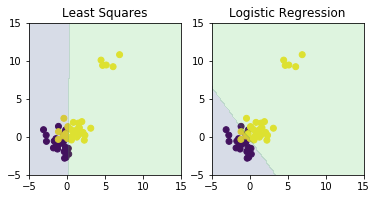

In [6]:
x_train, y_train = create_toy_data(add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)

logistic_regressor = LogisticRegressor()
logistic_regressor.fit(X_train, y_train)
y_lr = logistic_regressor.classify(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

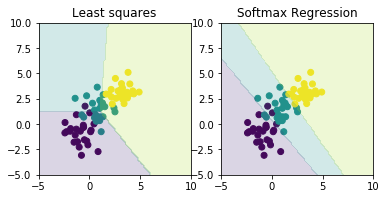

In [7]:
x_train, y_train = create_toy_data(add_class=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)

logistic_regressor = SoftmaxRegressor()
logistic_regressor.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y_lr = logistic_regressor.classify(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Softmax Regression")
plt.show()